In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dfunc import feat_to_dum

pd.set_option('display.max_columns', 300)

In [2]:
df = pd.read_csv('fake_job_postings.csv')

In [4]:
df = df.loc[df['location'].str[:2] == 'US']

In [5]:
# Drop unused columns
df.drop(columns=['industry', 'function', 'requirements', 'benefits'], inplace=True)
df.drop(columns=['title'], inplace=True)
df.drop(columns=['job_id'], inplace=True)
df.drop(columns=['description'], inplace=True)

In [6]:
# Dummy/one-hot encode proper columns
df['salary_range'] = np.where(df['salary_range'].isna() == True, 0, 1)
df['department'] = np.where(df['department'].isna() == True, 0, 1)
df['company_profile'] = np.where(df['company_profile'].isna() == True, 0, 1)
df = feat_to_dum(df, 'employment_type', s_value='Unspecified', pref='et')
df = feat_to_dum(df, 'required_experience', s_value='Unspecified', pref='rex')
df = feat_to_dum(df, 'required_education', s_value='Unspecified', pref='red')

Feature Dummied and Dropped: employment_type
Feature Dummied and Dropped: required_experience
Feature Dummied and Dropped: required_education


In [7]:
# Categorize states
condition = df['location'].str.extract(r'([A-Z]{2}(?<!US))').notnull()
value = df['location'].str.extract(r'([A-Z]{2}(?<!US))')
df['state'] = np.where(condition, value, 'No State')
df['state'] = np.where((df['state'] == 'AU') | (df['state'] == 'LO'), 'No State', df['state'])
df.drop(columns='location', inplace=True)

In [10]:
# Set style of plots
plt.style.use('seaborn-deep')

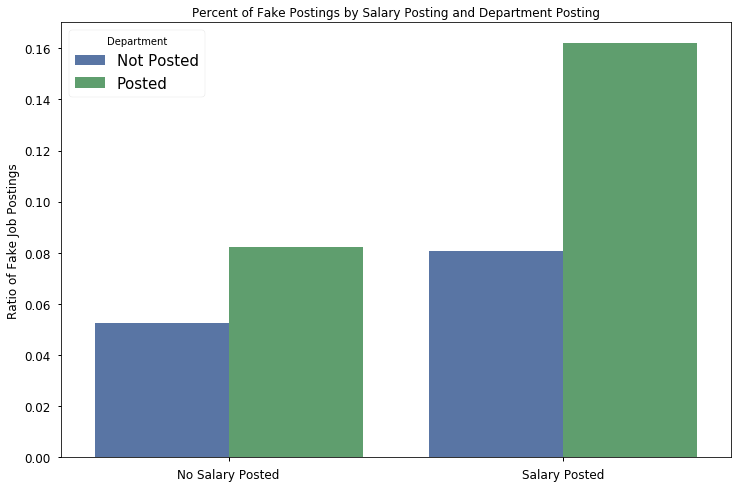

In [11]:
# Plot Fake posts with respect to Salary and department posting
plt.figure(figsize=(12,8))
sns.barplot(x='salary_range', y='fraudulent', hue='department', data=df, ci=None)
plt.title('Percent of Fake Postings by Salary Posting and Department Posting', fontsize='large')
plt.xticks(ticks=[0,1], labels=['No Salary Posted', 'Salary Posted'], fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel(None)
plt.ylabel('Ratio of Fake Job Postings', fontsize='large')
plt.legend(['Not Posted', 'Posted'], loc=2, prop={'size': 15}, title='Department', fontsize='large')
plt.show()